# 信號與系統實習


## 實驗開始步驟：

### (1)前往 https://github.com/htygithub/SS_EXP 點選右下角按鈕 "Download Zip"
### (2)開啟 Lesson_5_Image_Processing

## 實驗十六
### 執行以下程式碼並觀察輸出
### 影像以及濾波器

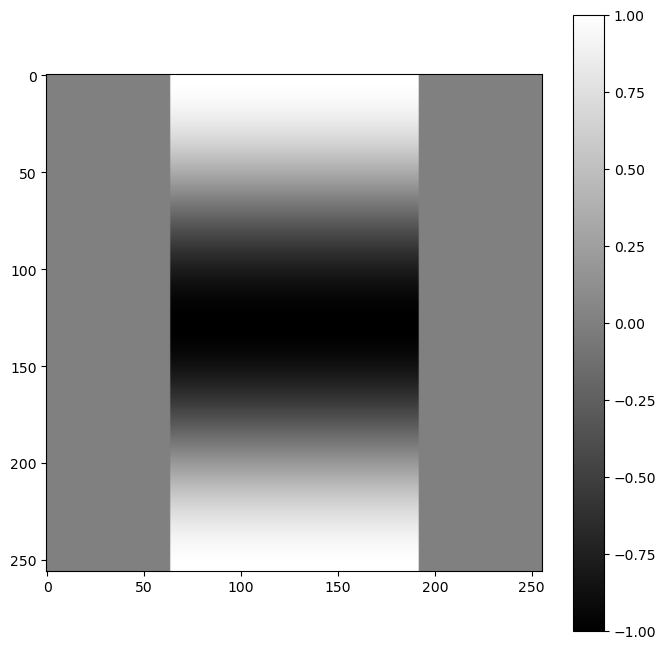

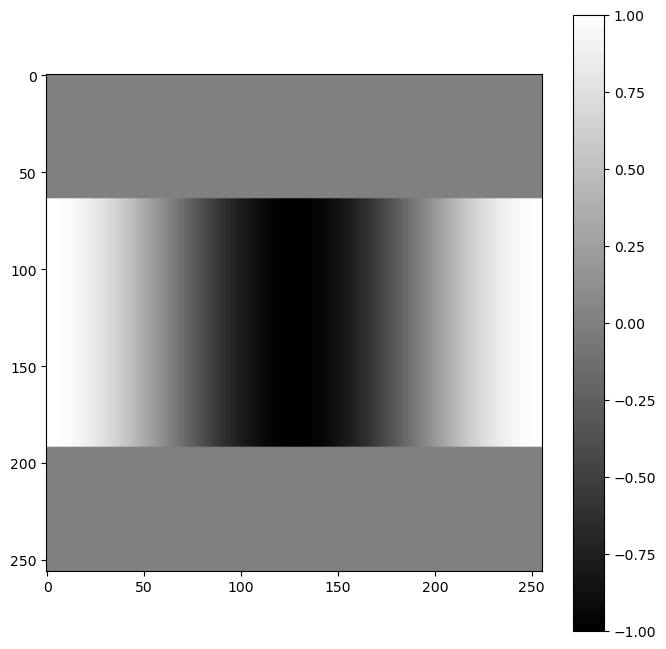

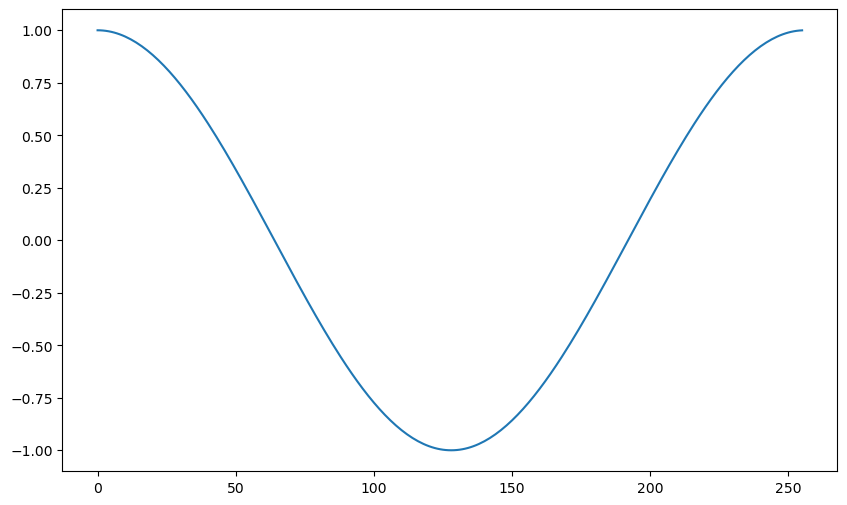

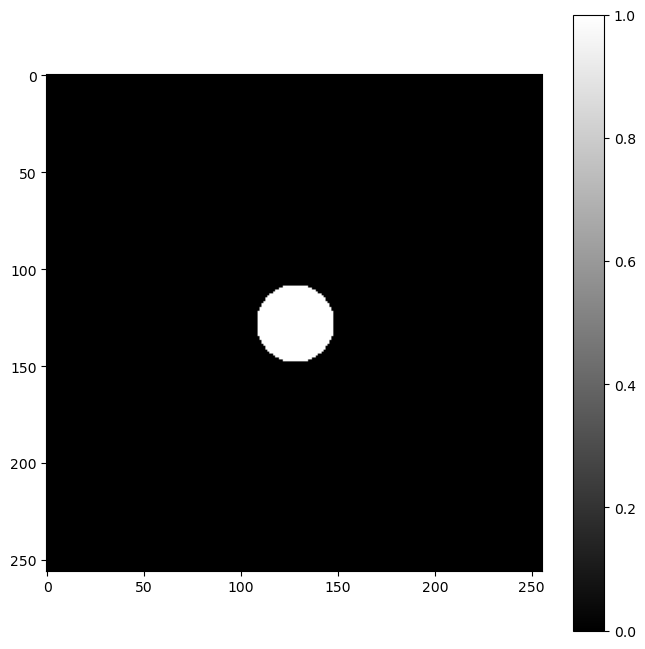

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(256)
x = np.cos(2*np.pi*n/256)
img = np.zeros((256, 256))

for ii in range(64, 192):
    img[:, ii] = x
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.colorbar()

img2 = np.zeros((256, 256))
for ii in range(64, 192):
    img2[ii, :] = x
plt.figure(figsize=(8,8))
plt.imshow(img2, cmap='gray')
plt.colorbar()

signal = img[:, 128]
plt.figure(figsize=(10,6))
plt.plot(signal)

img3 = np.zeros((256, 256))

for xx in range(256):
    for yy in range(256):
        r = ((xx - 128)**2 + (yy - 128)**2) ** 0.5
        if r < 20:
            img3[xx, yy] = 1

plt.figure(figsize=(8,8))
plt.imshow(img3, cmap='gray')
plt.colorbar()


## 問題十六
### (1) 請製作一個256x256的黑白影像，影像背景為零。圖中，有一個"甜甜圈"，圓心位於(128, 128)，內圈是半徑為60 個像素的圓，外圈為80個像素的圓
### (2)參考實驗14，設計一個FIR濾波器 bk = [1/4, -2/4, 1/4]。將影像的每一列視為一維信號並將以濾波，得到新的影像。並繪製出來
### (3)同上題，改將每一"行"視為一維信號並將以濾波，得到新的影像。並繪製出來
### (4) 上網查詢現成之 convolve指令, 用以下之2D kernel來過濾甜甜圈影像，並觀察結果
```
from scipy.ndimage.filters import convolve
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
```

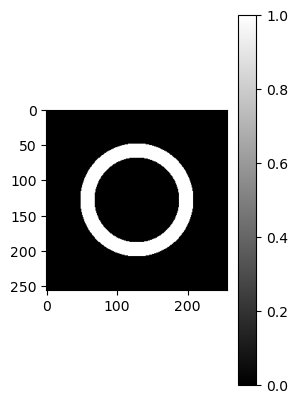

In [24]:
img3 = np.zeros((256, 256))

for xx in range(256):
    for yy in range(256):
        r = ((xx - 128)**2 + (yy - 128)**2) ** 0.5
        if r < 80:
            img3[xx, yy] = 1.0
        if r < 60:
            img3[xx, yy] = 0.0

plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.colorbar()

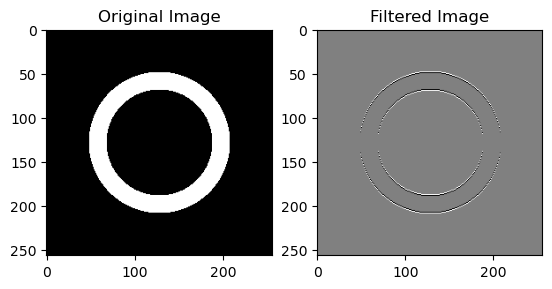

In [16]:
filtered_img3 = np.zeros_like(img3)
bk = np.array([1/4, -2/4, 1/4])

for col in range(img3.shape[1]):
    for i in range(1, img3.shape[0]-1):
        filtered_img[i, col] = img3[i-1, col]*bk[0] + img3[i, col]*bk[1] + img3[i+1, col]*bk[2]

plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')

plt.show()

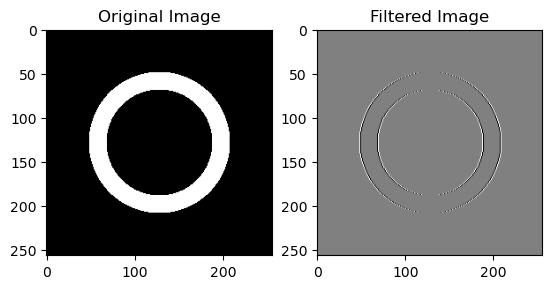

In [19]:
filtered_img3 = np.zeros_like(img3)
bk = np.array([1/4, -2/4, 1/4])

for row in range(img3.shape[0]):
    for i in range(1, img3.shape[1]-1):
        filtered_img[row, i] = img3[row, i-1]*bk[0] + img3[row, i]*bk[1] + img3[row, i+1]*bk[2]

plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_3492\2660536147.py:1: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


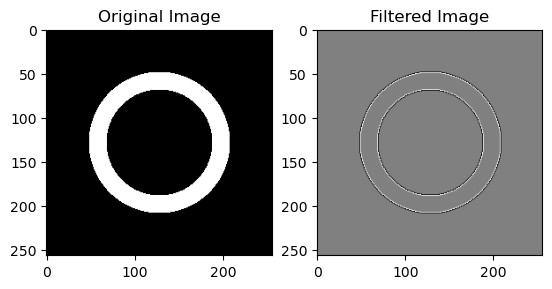

In [25]:
from scipy.ndimage.filters import convolve
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
filtered_img = convolve(img3, kernel, mode='constant', cval=0.0)

plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')
plt.show()


## 問題十七
### 執行以下程式碼並觀察輸出
### 影像開啟

uint8 (512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

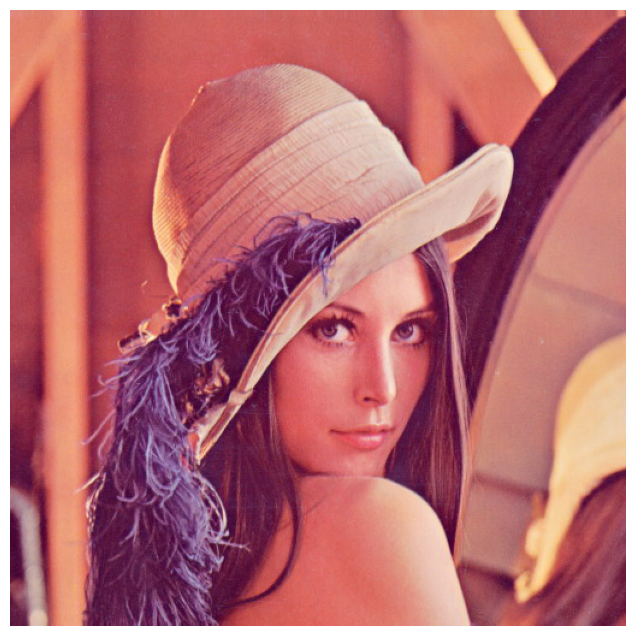

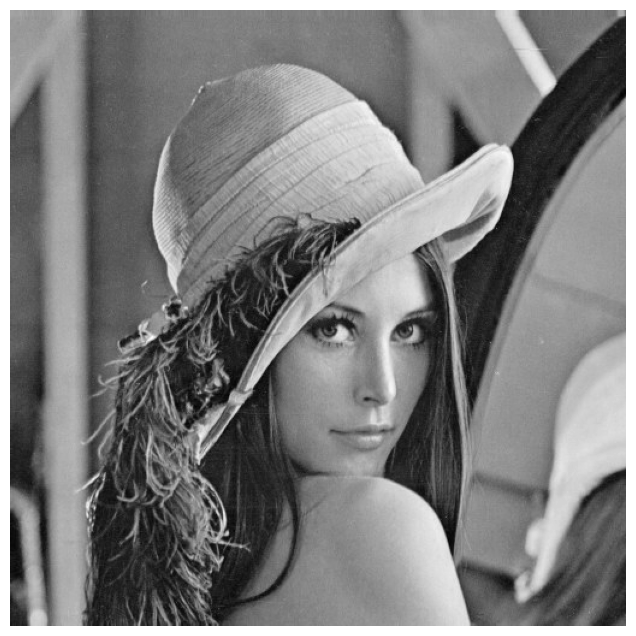

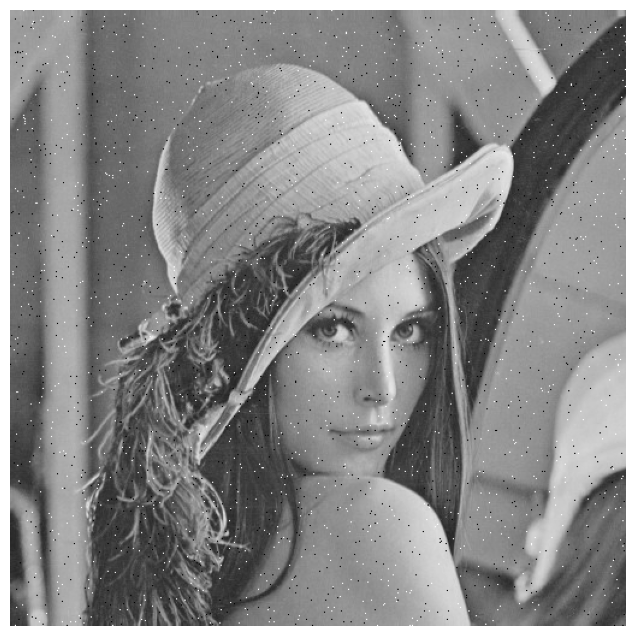

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
lena_img = plt.imread('lena_std.jpg')
lena_gray = np.mean(lena_img, axis=-1)
print(lena_img.dtype, lena_img.shape)
plt.figure(figsize=(8,8))
plt.imshow(lena_img)
plt.axis('off')

plt.figure(figsize=(8,8))
plt.imshow(lena_gray, cmap='gray')
plt.axis('off')

lena_noise = lena_gray.copy()
lena_noise[np.random.random(lena_noise.shape) > 0.995] = 0
lena_noise[np.random.random(lena_noise.shape) > 0.995] = 255
plt.figure(figsize=(8,8))
plt.imshow(lena_noise, cmap='gray')
plt.axis('off')

## 問題十七
### (1) 參考問題十六，設計一9點平均kernel來對lena_noise濾波
kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9,  1/9, 1/9],
                   [1/9, 1/9, 1/9]])
### (2) 上網搜尋medfilt使用方法，對lena_noise濾波並觀察結果，嘗試理解median filter之原理

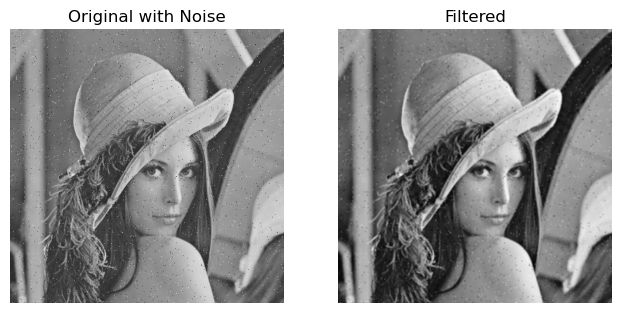

In [35]:
kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])
lena_filtered = convolve(lena_noise, kernel)
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(lena_noise, cmap='gray')
plt.title('Original with Noise')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(lena_filtered, cmap='gray')
plt.title('Filtered')
plt.axis('off')

plt.show()

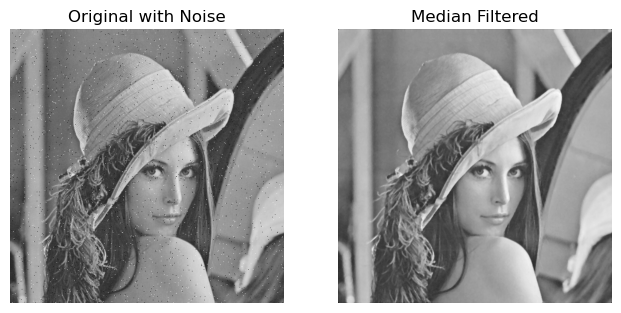

In [34]:
from scipy.signal import medfilt

lena_median_filtered = medfilt(lena_noise)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(lena_noise, cmap='gray')
plt.title('Original with Noise')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(lena_median_filtered, cmap='gray')
plt.title('Median Filtered')
plt.axis('off')


plt.show()

## 問題十八
## Arduino實驗板測試
https://github.com/htylab/SS_EXP/blob/master/%E4%BF%A1%E8%99%9F%E8%88%87%E7%B3%BB%E7%B5%B1%E5%AF%A6%E7%BF%92_%E5%BF%83%E8%B7%B3%E4%BF%A1%E8%99%9F%E9%87%8F%E6%B8%AC.pptx